<a href="https://colab.research.google.com/github/harishkodidela/Data-Science-Project/blob/main/Precipitation_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import plotly.express as px

###Importing Data

In [42]:
cd = pd.read_csv("https://raw.githubusercontent.com/harishkodidela/Data-Science-Project/main/bengaluru1972_2022.csv")
cd

,datetime,rain,temp_min,temp_max
0,1972-01-01,0.0000,16.1600,27.9200
1,1972-01-02,0.0000,15.0800,27.7900
2,1972-01-03,0.0000,13.6800,28.7300
3,1972-01-04,0.0000,14.1500,28.9200
4,1972-01-05,0.0000,13.6800,28.4400
...,...,...,...,...
18623,2022-12-27,1.3664,20.2516,27.6140
18624,2022-12-28,0.2756,19.9058,29.5648
18625,2022-12-29,0.0000,18.8444,29.6711
18626,2022-12-30,0.0000,17.6626,29.0639


###Exploratory Data Analysis

In [43]:
cd.isnull().sum()

datetime    0
rain        0
temp_min    0
temp_max    0
dtype: int64

In [44]:
cd.head()

,datetime,rain,temp_min,temp_max
0,1972-01-01,0.0,16.16,27.92
1,1972-01-02,0.0,15.08,27.79
2,1972-01-03,0.0,13.68,28.73
3,1972-01-04,0.0,14.15,28.92
4,1972-01-05,0.0,13.68,28.44


In [45]:
cd['datetime'] = pd.to_datetime(cd['datetime'])
cd.set_index('datetime', inplace=True)
cd.describe()

,rain,temp_min,temp_max
count,18628.000000,18628.000000,18628.000000
mean,2.390269,19.863458,31.024659
std,7.880106,2.314303,2.843120
min,0.000000,11.640000,20.910000
25%,0.000000,18.600000,28.960000
50%,0.000000,20.470000,30.510000
75%,0.748575,21.360000,33.020000
max,188.487700,25.380000,39.309200


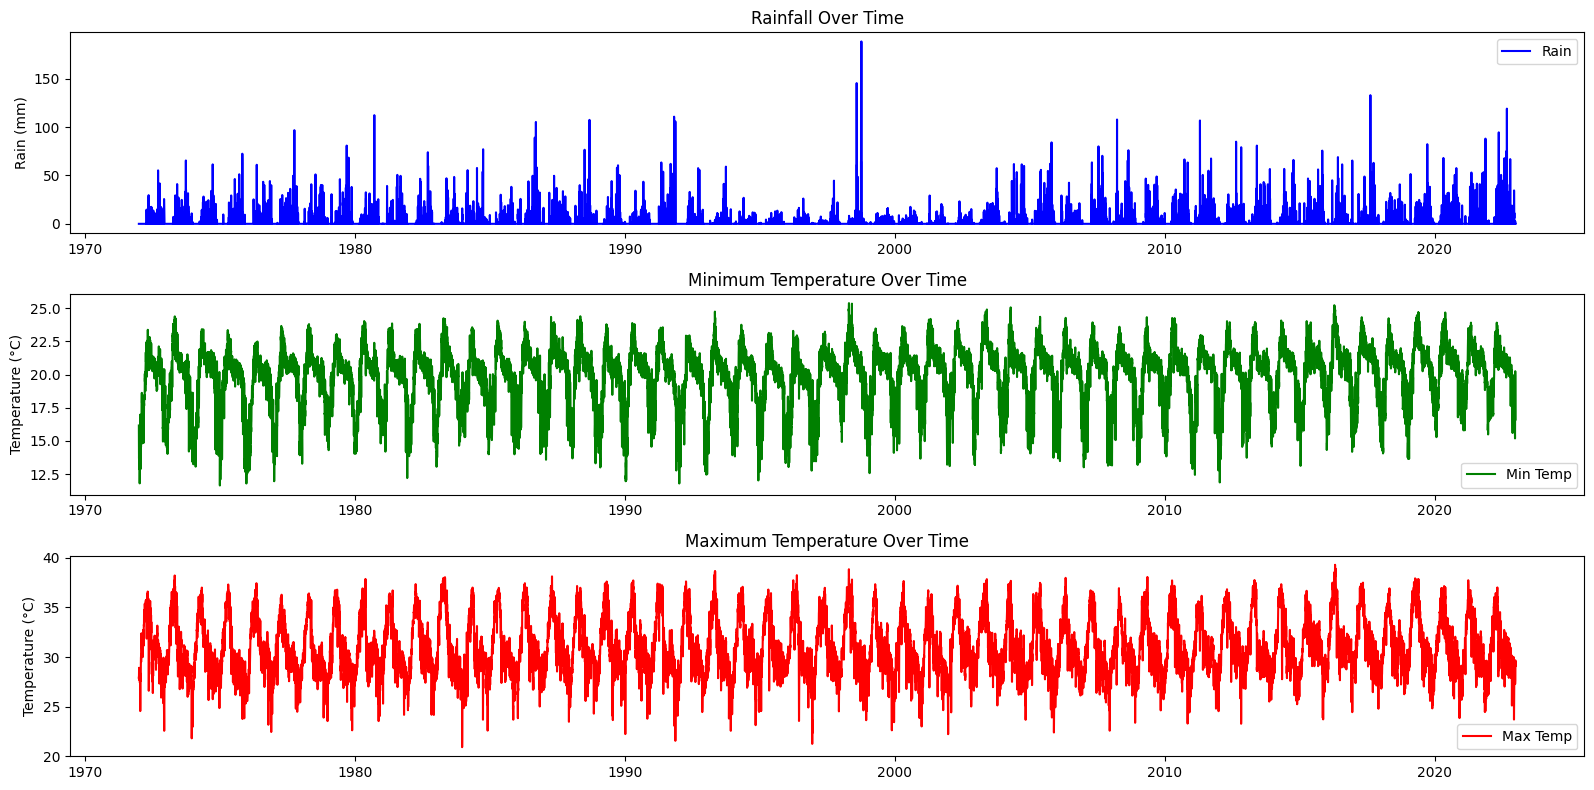

In [46]:
plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 1)
plt.plot(cd.index, cd['rain'], label='Rain', color='blue')
plt.title('Rainfall Over Time')
plt.ylabel('Rain (mm)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(cd.index, cd['temp_min'], label='Min Temp', color='green')
plt.title('Minimum Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(cd.index, cd['temp_max'], label='Max Temp', color='red')
plt.title('Maximum Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.show()

###Monthly and Yearly Trends

In [47]:
cd['Year'] = cd.index.year
cd['Month'] = cd.index.month
monthly_avg = cd.groupby('Month').mean()
yearly_avg = cd.groupby('Year').mean()
cd.reset_index(inplace=True)

<ipython-input-48-5030517fc57c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-5030517fc57c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



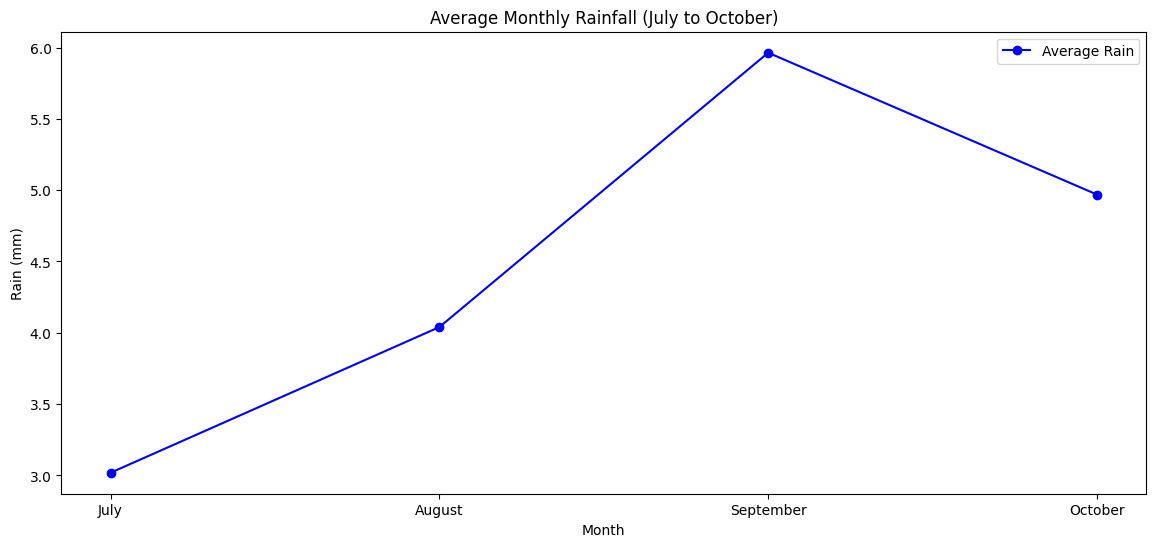

In [48]:
cd['datetime'] = pd.to_datetime(cd['datetime'])
cd_filtered = cd[cd['datetime'].dt.month.isin([7, 8, 9, 10])]

cd_filtered['year'] = cd_filtered['datetime'].dt.year
cd_filtered['month'] = cd_filtered['datetime'].dt.month
monthly_avg = cd_filtered.groupby('month')['rain'].mean()

plt.figure(figsize=(14, 6))
plt.plot(monthly_avg.index, monthly_avg.values, label='Average Rain', color='blue', marker='o')
plt.title('Average Monthly Rainfall (July to October)')
plt.xlabel('Month')
plt.ylabel('Rain (mm)')
plt.xticks([7, 8, 9, 10], ['July', 'August', 'September', 'October'])
plt.legend()
plt.show()


In [49]:
cd_filtered.loc[:, 'year'] = cd_filtered['datetime'].dt.year
yearly_avg = cd_filtered.groupby('year')['rain'].mean().reset_index()
fig = px.line(yearly_avg, x='year', y='rain', title='Yearly Average Rainfall (July to October)',
              labels={'year': 'Year', 'rain': 'Average Rain (mm)'}, markers=True)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Rain (mm)',
    legend_title='Legend',
    hovermode='x unified'
)
fig.show()

####Mothly Trend Plots

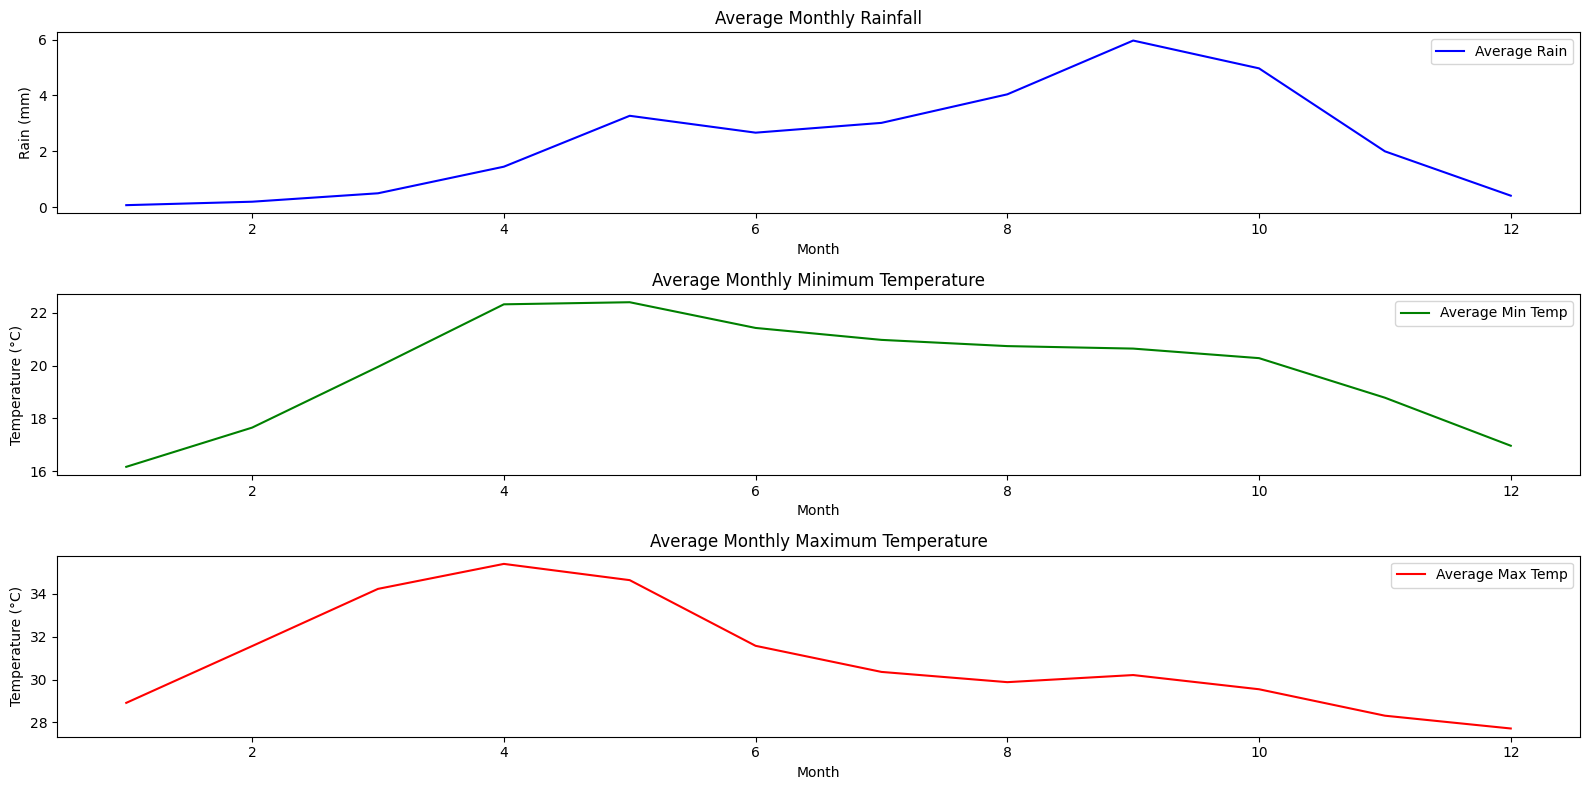

In [51]:
cd['datetime'] = pd.to_datetime(cd['datetime'])
cd.set_index('datetime', inplace=True)
cd['Year'] = cd.index.year
cd['Month'] = cd.index.month
monthly_avg = cd.groupby('Month').mean()
yearly_avg = cd.groupby('Year').mean()
cd.reset_index(inplace=True)

plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 1)
plt.plot(monthly_avg.index, monthly_avg['rain'], label='Average Rain', color='blue')
plt.title('Average Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Rain (mm)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(monthly_avg.index, monthly_avg['temp_min'], label='Average Min Temp', color='green')
plt.title('Average Monthly Minimum Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(monthly_avg.index, monthly_avg['temp_max'], label='Average Max Temp', color='red')
plt.title('Average Monthly Maximum Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.show()

####Yearly Trend Plots

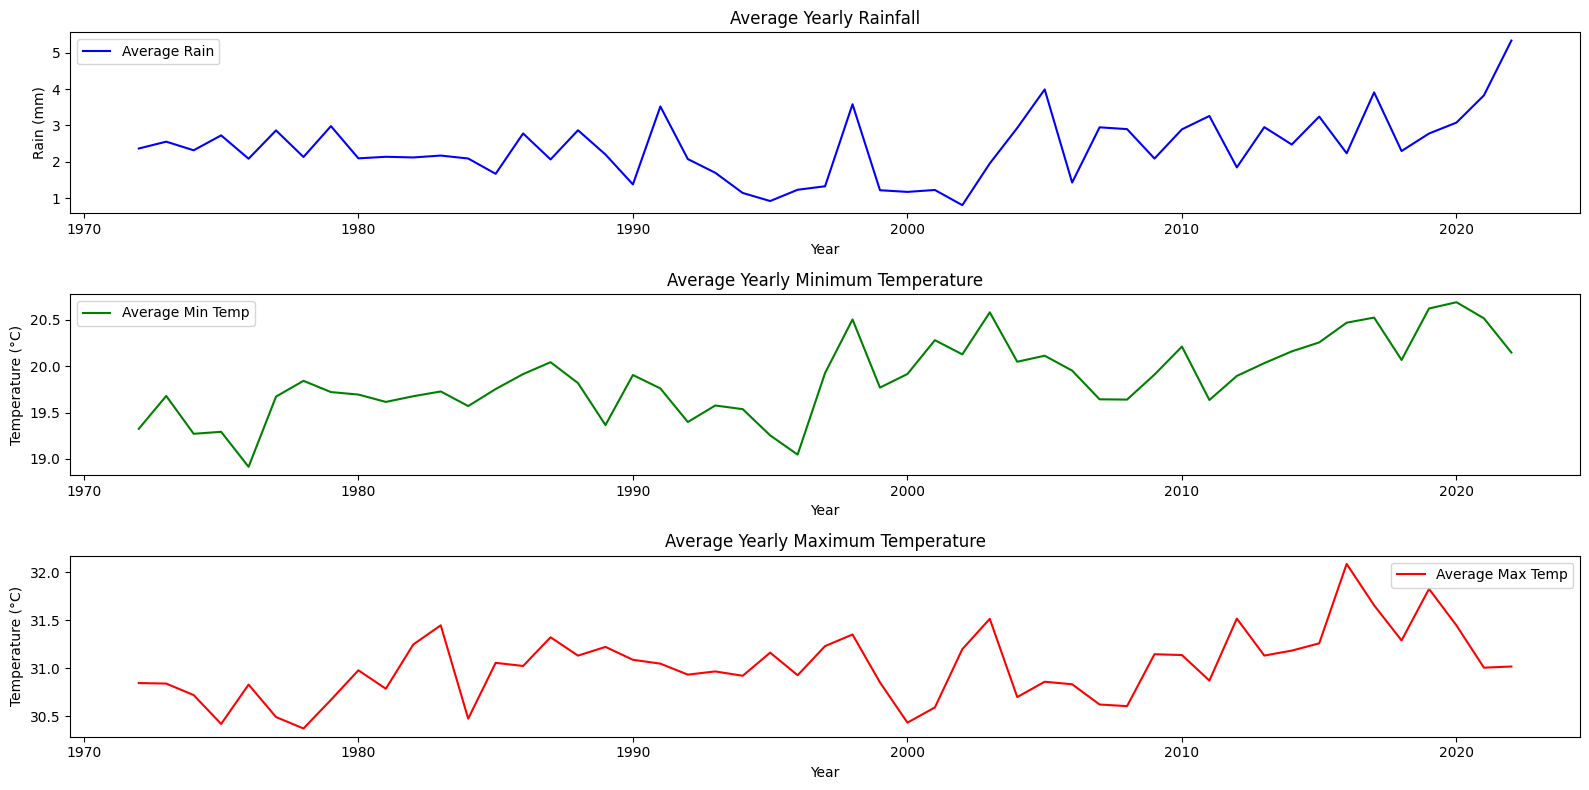

In [52]:
plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 1)
plt.plot(yearly_avg.index, yearly_avg['rain'], label='Average Rain', color='blue')
plt.title('Average Yearly Rainfall')
plt.xlabel('Year')
plt.ylabel('Rain (mm)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(yearly_avg.index, yearly_avg['temp_min'], label='Average Min Temp', color='green')
plt.title('Average Yearly Minimum Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(yearly_avg.index, yearly_avg['temp_max'], label='Average Max Temp', color='red')
plt.title('Average Yearly Maximum Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.show()

###Seasonal Decompostion: Rainfall

In [55]:
rain_decompose = seasonal_decompose(cd['rain'], model='additive', period=365)
rain_trend = rain_decompose.trend
rain_seasonal = rain_decompose.seasonal
rain_resid = rain_decompose.resid

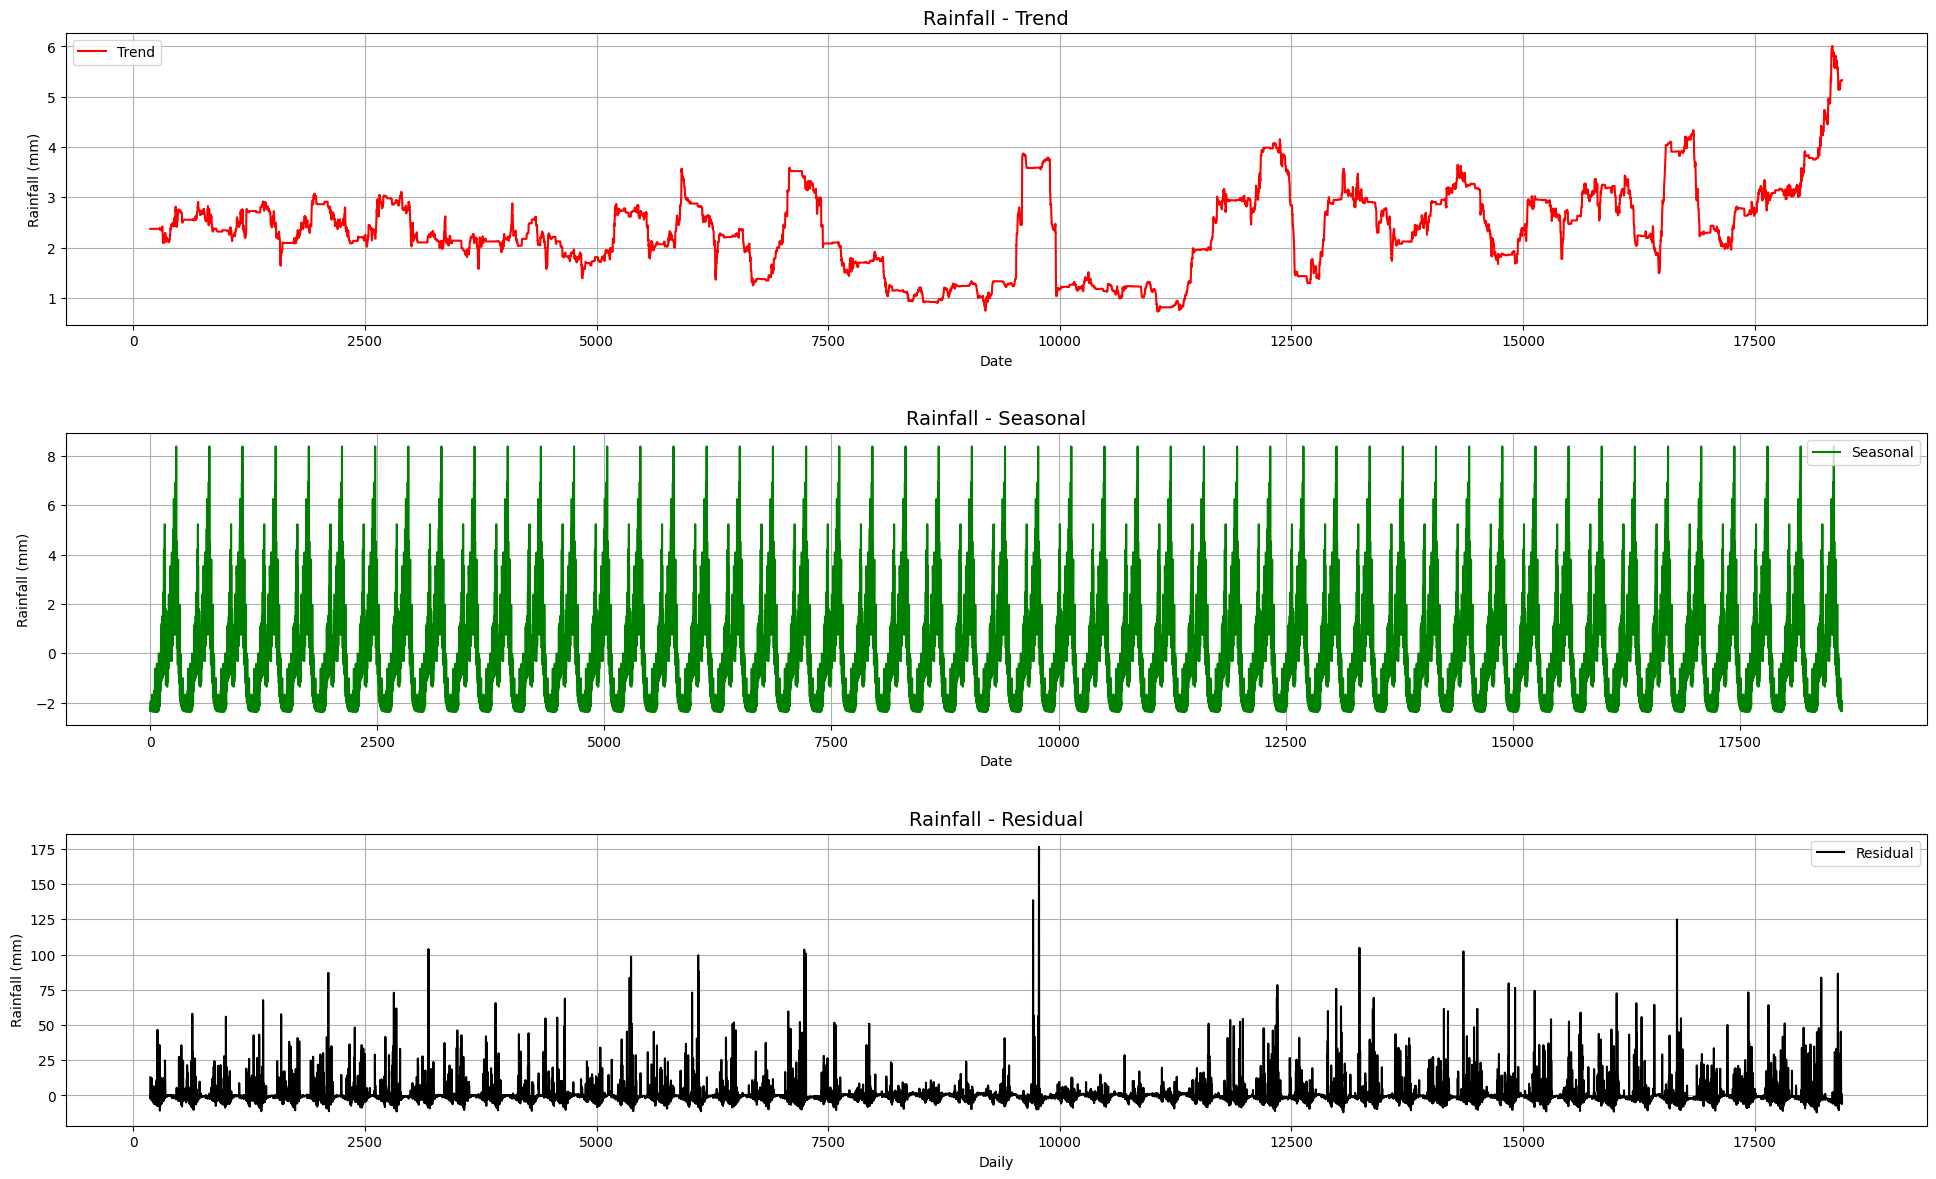

In [56]:
plt.figure(figsize=(20, 16))

plt.subplot(4, 1, 1)
plt.plot(cd.index, rain_trend, label='Trend', color='red', linewidth=1.5)
plt.title('Rainfall - Trend', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(cd.index, rain_seasonal, label='Seasonal', color='green', linewidth=1.5)
plt.title('Rainfall - Seasonal', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(cd.index, rain_resid, label='Residual', color='black', linewidth=1.5)
plt.title('Rainfall - Residual', fontsize=14)
plt.xlabel('Daily')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)

plt.tight_layout(pad=3.0)
plt.show()

###Seasonal Decompostion: Max Temp

In [57]:
temp_max_decompose = seasonal_decompose(cd['temp_max'], model='additive', period=365)
temp_max_trend = temp_max_decompose.trend
temp_max_seasonal = temp_max_decompose.seasonal
temp_max_resid = temp_max_decompose.resid

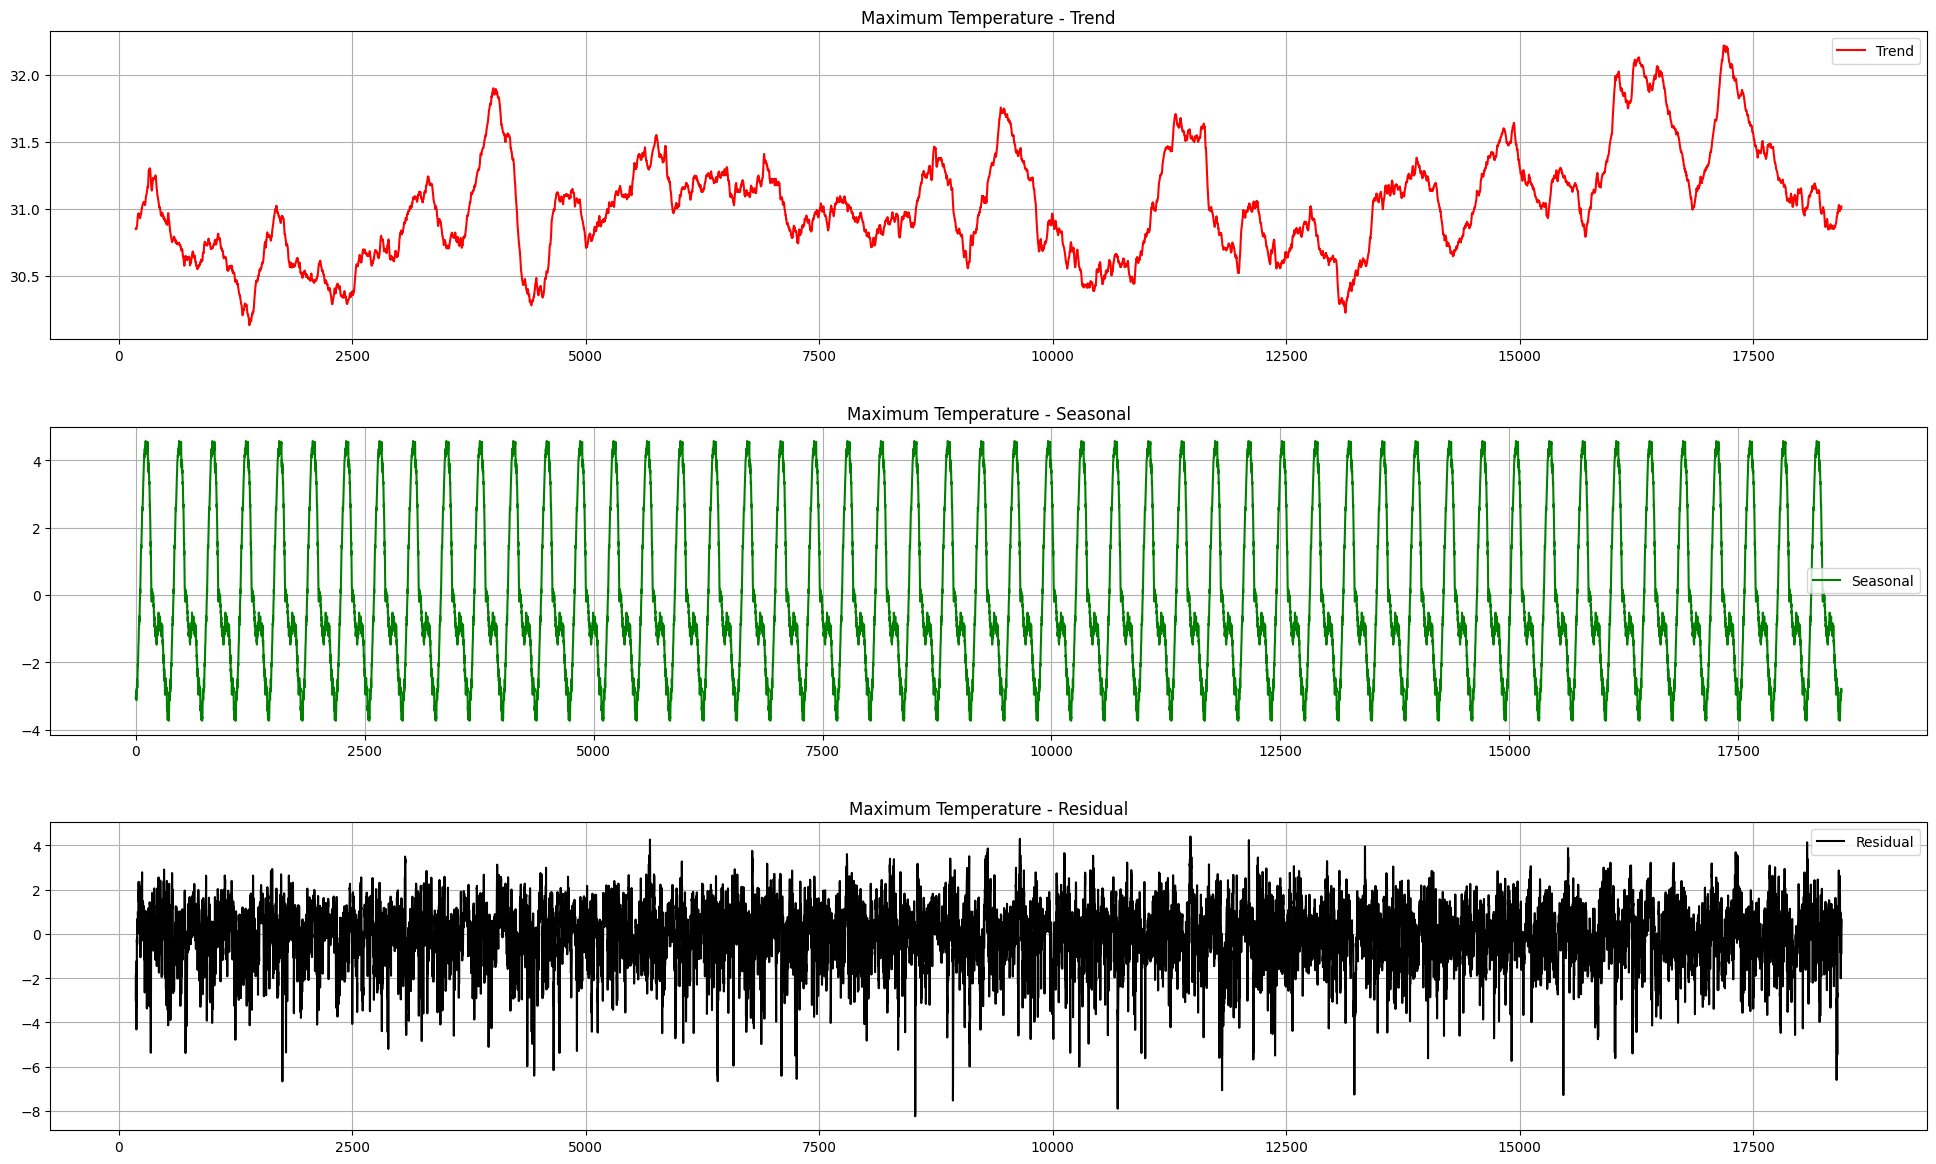

In [58]:
plt.figure(figsize=(20, 16))

plt.subplot(4, 1, 1)
plt.plot(cd.index, temp_max_trend, label='Trend', color='red', linewidth=1.5)
plt.title('Maximum Temperature - Trend')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(cd.index, temp_max_seasonal, label='Seasonal', color='green', linewidth=1.5)
plt.title('Maximum Temperature - Seasonal')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(cd.index, temp_max_resid, label='Residual', color='black', linewidth=1.5)
plt.title('Maximum Temperature - Residual')
plt.legend()
plt.grid(True)

plt.tight_layout(pad = 3.0)
plt.show()

###Correlation Heatmap

In [61]:
cd.corr()

,datetime,rain,temp_min,temp_max,Year,Month
datetime,1.000000,0.037550,0.120726,0.050205,0.999808,0.019601
rain,0.037550,1.000000,0.117608,-0.062862,0.035328,0.115721
temp_min,0.120726,0.117608,1.000000,0.530940,0.120167,0.033654
temp_max,0.050205,-0.062862,0.530940,1.000000,0.059941,-0.496009
Year,0.999808,0.035328,0.120167,0.059941,1.000000,0.000062
Month,0.019601,0.115721,0.033654,-0.496009,0.000062,1.000000


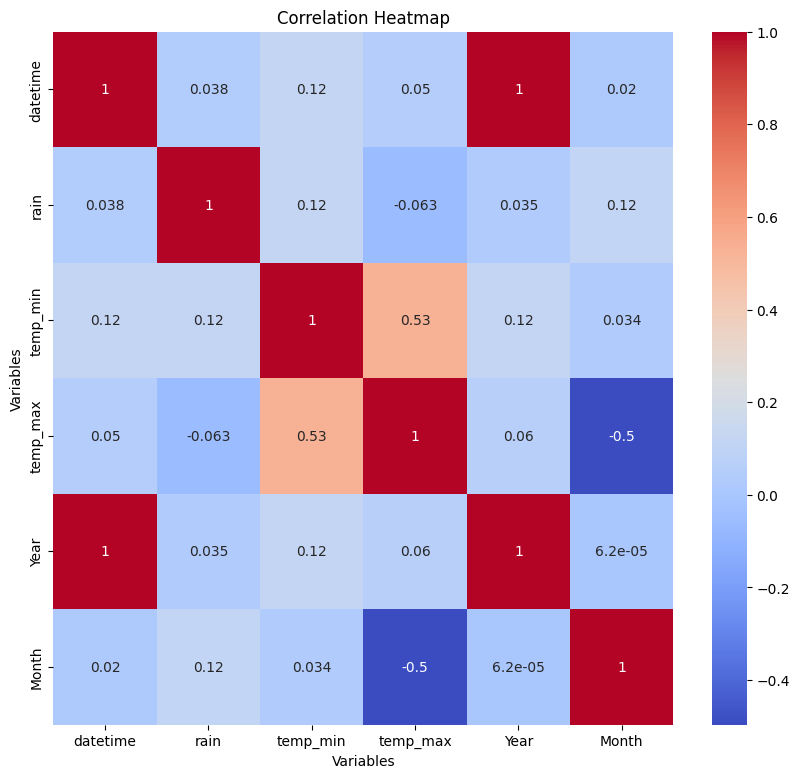

In [62]:
plt.figure(figsize=(10, 9))
#cmap = sns.color_palette("twilight", 10)
sns.heatmap(cd.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

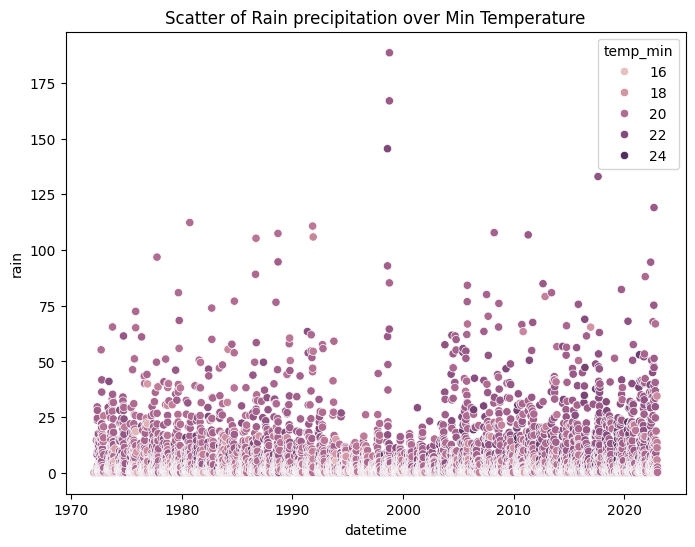

In [63]:
cd_filtered =cd[cd['rain']>0]
plt.figure(figsize=(8,6))
sns.scatterplot(x=cd_filtered['datetime'], y=cd_filtered['rain'],hue=cd_filtered['temp_min'])
plt.title('Scatter of Rain precipitation over Min Temperature')
plt.show()

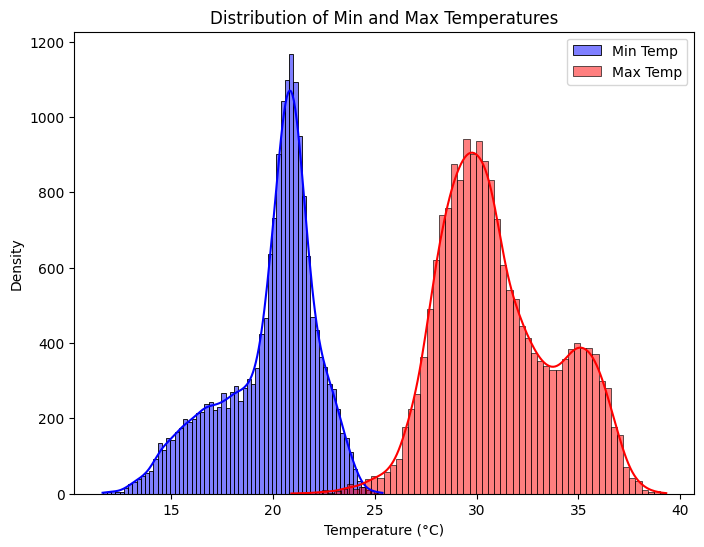

In [64]:
plt.figure(figsize=(8,6))
sns.histplot(cd['temp_min'], kde=True, color='blue', label='Min Temp')
sns.histplot(cd['temp_max'], kde=True, color='red', label='Max Temp')
plt.title("Distribution of Min and Max Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Density")
plt.legend()
plt.show()

###Pre-Processing

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [21]:
cd['year'] = cd['datetime'].dt.year
cd['month'] = cd['datetime'].dt.month
cd['day'] = cd['datetime'].dt.day
cd['dayofweek'] = cd['datetime'].dt.dayofweek

cd = cd.drop(columns=['datetime'])

X = cd.drop(columns=['rain'])
y = cd['rain'].apply(lambda x: 1 if x > 0 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['temp_min', 'temp_max', 'year', 'month', 'day', 'dayofweek']
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

###Training and Testing Models

In [22]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
}
results = {}
best_model_name = None
best_accuracy = 0
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {'accuracy': accuracy, 'report': report}
    print(f'Model: {name}')
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Square Error: {rmse}")
    print(f"R-squared: {r2}")
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print('-'*30)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

print(f"Best Model: {best_model_name}")
print(f"Best Model Accuracy: {best_accuracy}")

Model: Logistic Regression
Mean Absolute Error: 0.2608695652173913
Mean Squared Error: 0.2608695652173913
Root Mean Square Error: 0.5107539184552492
R-squared: -0.18459042560150718
Accuracy: 0.7391304347826086
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2506
           1       0.62      0.52      0.56      1220

    accuracy                           0.74      3726
   macro avg       0.70      0.68      0.69      3726
weighted avg       0.73      0.74      0.73      3726

------------------------------
Model: Random Forest
Mean Absolute Error: 0.23295759527643586
Mean Squared Error: 0.23295759527643586
Root Mean Square Error: 0.48265680900245866
R-squared: -0.05784412491986446
Accuracy: 0.7670424047235641
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2506
           1       0.65      0.64      0.64      1220

    accuracy                           0.77      3726
   macr

####Models Hyperparameter tuning

In [23]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__solver': ['liblinear']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 10, 20, 30]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'Neural Network': {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'classifier__hidden_layer_sizes': [(50,), (100,), (100, 50)],
            'classifier__alpha': [0.0001, 0.001, 0.01]
        }
    }
}

####Performing Tuning

In [24]:
best_models = {}

for name, model_info in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model_info['model'])
    ])
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f'Best parameters for {name}: {grid_search.best_params_}')
    print(f'Best cross-validated score for {name}: {grid_search.best_score_}')


Best parameters for Logistic Regression: {'classifier__C': 100, 'classifier__solver': 'liblinear'}
Best cross-validated score for Logistic Regression: 0.7284920379405136
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Best cross-validated score for Random Forest: 0.7628509418712246
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}
Best cross-validated score for Gradient Boosting: 0.7579519957493657
Best parameters for Neural Network: {'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (100,)}
Best cross-validated score for Neural Network: 0.7597634458955939


####Comparing and Finding Best Model

In [25]:
final_results = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    final_results[name] = {'accuracy': accuracy, 'report': report, 'y_pred': y_pred}
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print('-'*30)

best_model_name = max(final_results, key=lambda name: final_results[name]['accuracy'])

print("Best Model")
print(best_model_name)
print(final_results[best_model_name])

Model: Logistic Regression
Accuracy: 0.7391304347826086
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2506
           1       0.62      0.52      0.56      1220

    accuracy                           0.74      3726
   macro avg       0.70      0.68      0.69      3726
weighted avg       0.73      0.74      0.73      3726

------------------------------
Model: Random Forest
Accuracy: 0.7667740203972088
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2506
           1       0.65      0.64      0.64      1220

    accuracy                           0.77      3726
   macro avg       0.74      0.73      0.73      3726
weighted avg       0.77      0.77      0.77      3726

------------------------------
Model: Gradient Boosting
Accuracy: 0.7654320987654321
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2506
           1   

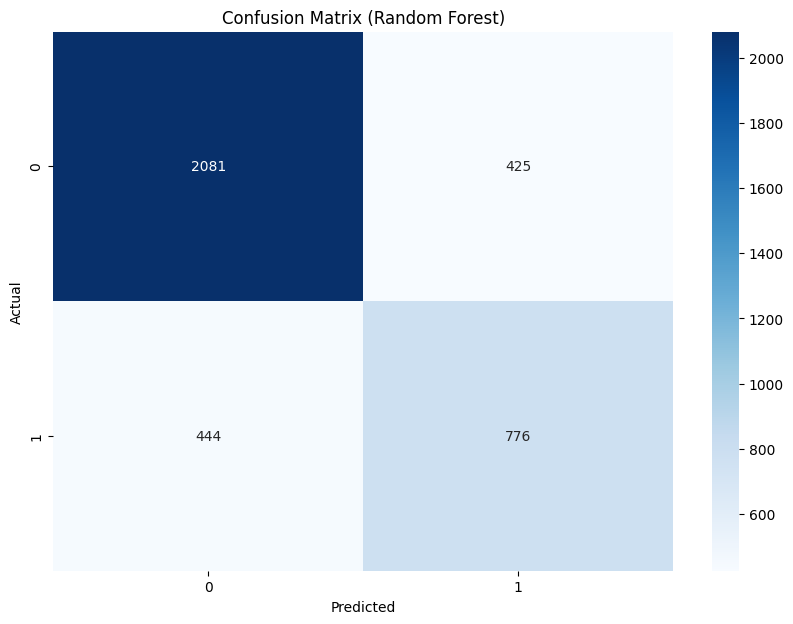

In [26]:
from sklearn.metrics import confusion_matrix
best_y_pred = final_results[best_model_name]['y_pred']

cm = confusion_matrix(y_test, best_y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix ({best_model_name})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
test = X_test[0:10]
model = best_models['Random Forest']
y_pred = model.predict(test)
y_test_sample = y_test[0:10]
print(y_pred)

[0 0 0 1 0 1 0 0 1 1]


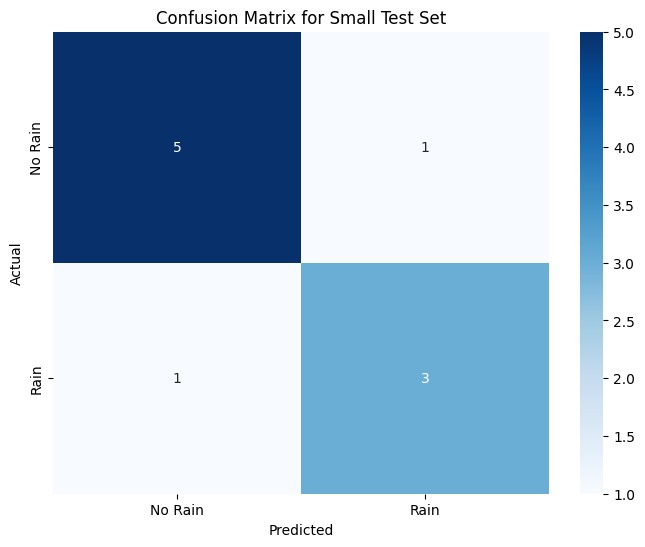

In [28]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test_sample, y_pred, 'Confusion Matrix for Small Test Set')
